<a href="https://colab.research.google.com/github/hetal-tiwari/Resume-Recommendation-System/blob/main/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving resume_dataset.csv to resume_dataset.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
import numpy as np 
import pandas as pd
df = pd.read_csv('resume_dataset.csv' ,encoding='utf-8')
df['cleaned_resume'] = ''
df.head()

,ID,Category,Resume,cleaned_resume
0,1,Data Science,Skills * Programming Languages: Python (pandas...,
1,2,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,3,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,4,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,5,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [ ]:
df['Resume']=df['Resume'].str.lower()

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URl
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [ ]:
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
print (df['cleaned_resume'][31])

 good communication skill quick learner keen to find solutionseducation details mba marketing and international business management pune maharashtra pune university b tech tech nagpur maharashtra rtm nagpur universityg m arts commerce scienceg m arts commerce scienceskill details company details company samarth college description of engineering 30 7 210 5 college to campus vj college of pharmacy 10 days workshop 10 g m arts commerce science 6 soft skills 6 days workshop 6 college personality g m institute of agricultural 7 6 days workshop 6 development diploma 8 soft skills samarth college of polytechnic 20 days workshop 20 total 350 working experience in corporate sr no topic company no of days total hrs 1 presentation skill team elringklinger automotives pvt 1 day 8 building workshop ltd ranjangaon pune 2 negotiation skill kubler automation pvt ltd 2 days 16 communication skill chakan pune 3 business communication finanza home loans pimple 3 days 21 stress management saudagar pune 4

In [ ]:
features=df['cleaned_resume'].values
labels=df['Category'].values


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

In [ ]:
from keras.preprocessing.text import Tokenizer
## Tokenize the sentences
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(features)
ft = tokenizer.texts_to_sequences(features)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
ft = pad_sequences(ft, maxlen=250)
print('Shape of data tensor:', ft.shape)

Shape of data tensor: (169, 250)


In [ ]:
lb = pd.get_dummies(labels)
print('Shape of label tensor:', lb.shape)

Shape of label tensor: (169, 25)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(ft,lb, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(152, 250) (152, 25)
(17, 250) (17, 25)


In [ ]:
pip install seq2seq-lstm

  Created wheel for seq2seq-lstm: filename=seq2seq_lstm-0.1.4-cp36-none-any.whl size=14626 sha256=0c172ecba8e375b67888bfbcdcd12f805ac5307fbfd23ac955c1078496ce1c69
  Stored in directory: /root/.cache/pip/wheels/22/fb/c9/c48f5b1e28e2ee101b3880f8a472d8f85f5681dac84449aedb
Successfully built seq2seq-lstm


In [ ]:
from keras.layers import Embedding
from keras.layers.recurrent import LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.core import Dense, SpatialDropout1D



model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=X_train.shape[1] ))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(25, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
3/3 [==============================] - 2s 536ms/step - loss: 3.2189 - accuracy: 0.0441 - val_loss: 3.2232 - val_accuracy: 0.0000e+00
Epoch 2/5
3/3 [==============================] - 1s 409ms/step - loss: 3.2063 - accuracy: 0.1103 - val_loss: 3.2199 - val_accuracy: 0.1250
Epoch 3/5
3/3 [==============================] - 1s 416ms/step - loss: 3.1930 - accuracy: 0.1838 - val_loss: 3.2159 - val_accuracy: 0.1250
Epoch 4/5
3/3 [==============================] - 1s 429ms/step - loss: 3.1798 - accuracy: 0.1471 - val_loss: 3.2102 - val_accuracy: 0.1250
Epoch 5/5
3/3 [==============================] - 1s 415ms/step - loss: 3.1616 - accuracy: 0.1103 - val_loss: 3.2034 - val_accuracy: 0.1250


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1/1 [==============================] - 0s 2ms/step - loss: 3.2200 - accuracy: 0.0588
Test set
  Loss: 3.220
  Accuracy: 0.059


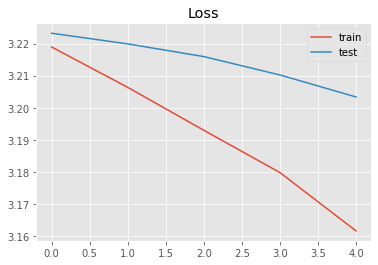

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

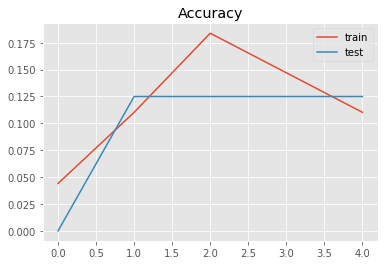

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()